In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#  Assignment 1 - Advance Machine Learning 159.738 

---

### Team members:
Ziyi Wang ID 18042783

## Content
* Loading datasets and resize data split to training and testing

---


#### Information about datasets
#### Labeled dogs and cats from Microsoft
* Dogs and Cats image https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [2]:
#!pip install opencv-python

In [3]:
#!pip install tensorflow

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
from PIL import Image 
import cv2
%matplotlib inline

In [5]:
# import the necessary packages
import sklearn
print(sklearn.__version__)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import argparse
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support

0.20.2


In [6]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 72
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 10
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 20

In [7]:
cwd = os.getcwd()
print(cwd)
#Please put the data to current location, Thanks 
        

/home/dp1/Documents/fred/codes/machinelearning2019/dogcat


In [8]:
DATADIR = "../PetImages"
DATADIR = os.path.join(cwd, DATADIR)
print(DATADIR)
CATEGORIES = ["Dog","Cat"]

/home/dp1/Documents/fred/codes/machinelearning2019/dogcat/../PetImages


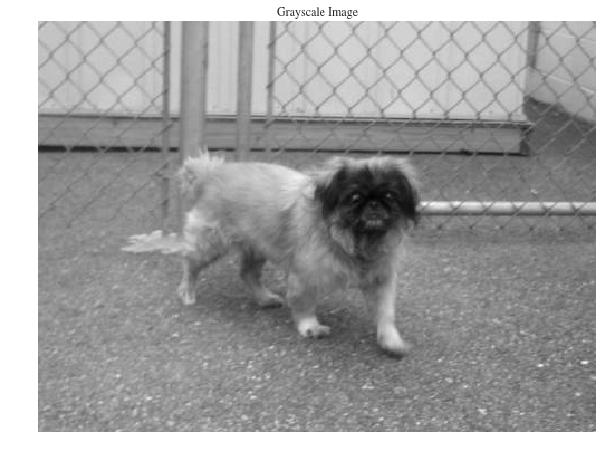

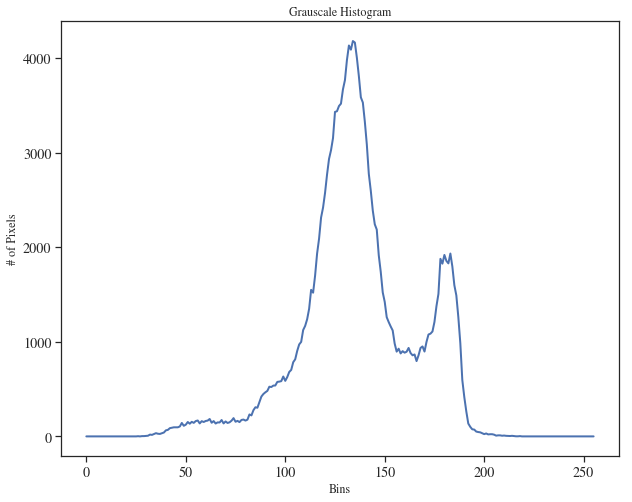

In [9]:

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#read and make it to grey scale
        img_gray_hist = cv2.calcHist([img_array],[0],None,[256],[0,256])
 
        plt.imshow(img_array,cmap='gray')
        plt.axis('off')
        plt.title('Grayscale Image')
        plt.show()

        plt.plot(img_gray_hist)
        plt.title('Grauscale Histogram')
        plt.xlabel('Bins')
        plt.ylabel('# of Pixels')
        plt.show()
        break
    break

In [10]:
def image_to_feature_vector(image, size=(50, 50)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    # handle normalizing the histogram if we are using OpenCV 2.4.X
    # if imutils.is_cv2():
    #    hist = cv2.normalize(hist)
    #print("line2")
    # otherwise, perform "in place" normalization in OpenCV 3
    #else:
    cv2.normalize(hist, hist)
    
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [11]:
import time
start = time.time()
print(start)

1556515240.0040731


In [12]:
rawImages = []
features = []
labels = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #conver the dog and cat to numerical value 0/1
        label = CATEGORIES.index(category)      
        for img in os.listdir(path):
            try:
                imgpath = os.path.join(path,img)
                img_array = cv2.imread(imgpath)
                pixels = image_to_feature_vector(img_array)    
                hist = extract_color_histogram(img_array)       
            except Exception as e:
                print(imgpath)
                os.remove(imgpath) 
                continue
            rawImages.append(pixels)
            features.append(hist)
            labels.append(label)

            
create_training_data()

In [13]:
end = time.time()
print(end)
print(end-start)

1556515326.216534
86.21246075630188


In [14]:
print(len(rawImages))
print(len(features))
print(len(labels))


24946
24946
24946


In [15]:
%%time
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
rawImages = pca.fit_transform(rawImages)


CPU times: user 11.6 s, sys: 604 ms, total: 12.2 s
Wall time: 2.65 s


In [16]:
rawImages.shape

(24946, 2)

In [17]:
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)

print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 0.39MB
[INFO] features matrix: 49.89MB


In [18]:
# partition the data into training and testing splits, using 85%
# of the data for training and the remaining 15% for testing
(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.15, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features, labels, test_size=0.15, random_state=42)

In [19]:
#import pickle
#dataset = {
#    'trainRI': trainRI,
#    'testRI' : testRI,
#    'trainRL': trainRL,
#    'testRL' : testRL
#}
#filename = 'rawImagesdataset.pickle'

#outfile = open(filename,'wb+')
#print(outfile)
#pickle.dump(dataset,outfile)
#outfile.close()

In [20]:
#import pickle

#dataset = {
#    'trainFeat': trainFeat,
#    'testFeat' : testFeat,
#    'trainLabels': trainLabels,
#    'testLabels' : testLabels
#}
#filename = 'features_scaleddataset.pickle'

#outfile = open(filename,'wb+')
#print(outfile)
#pickle.dump(dataset,outfile)
#outfile.close()

In [21]:
#import pickle

#with open('features_scaleddataset.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
 #   features_scaleddataset = pickle.load(f)
  #  f.close()
    
#(trainRI, testRI, trainRL, testRL) =   features_scaleddataset  

In [22]:
%%time
model_rgb_rf = RandomForestClassifier(n_estimators =15, max_depth =3, random_state=1234) # 1234随机初始化的种子
model_rgb_rf.fit(trainFeat, trainLabels) # 训练数据集

CPU times: user 575 ms, sys: 5 µs, total: 575 ms
Wall time: 575 ms


In [23]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model_rgb_rf, open(filename, 'wb'))

In [24]:
output_dir = cwd
print(labels)
print(len(trainLabels))
print(len(trainRI))
print(len(model_rgb_rf))

[0 0 0 ... 1 1 1]
21204
21204
15


In [25]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

In [26]:
%%time
cv_results = cross_validate(model_rgb_rf, testFeat, testLabels, cv=3,return_train_score=False)
sorted(cv_results.keys())                         

CPU times: user 185 ms, sys: 2 µs, total: 185 ms
Wall time: 184 ms


In [27]:
cv_results['test_score']   

array([0.63060897, 0.66078589, 0.62790698])

In [ ]:
from itertools import product
from IPython.display import Image 
from sklearn import tree 
import pydotplus

y_importances = model_rgb_rf.feature_importances_ 
x_importances = labels
y_pos = np.arange(len(x_importances)) 
# 横向柱状图 
plt.barh(y_pos, y_importances, align='center') 
plt.yticks(y_pos, x_importances) 
plt.xlabel('Importances') 
plt.xlim(0,1) 
plt.title('Features Importances') 
plt.show() 